In [11]:
from keras.models import load_model
import os
import glob
from keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img
import shutil
import PIL
import numpy as np

In [2]:
catsdogs= load_model("models/inception_trained_cat_dogs.h5")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [12]:
predict_gen = ImageDataGenerator(rescale=1./255)

In [95]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        "/media/hdd1/dataset/cats_dogs/data/train",
        target_size=(299, 299),
        batch_size=10,
        class_mode='binary')

Found 25000 images belonging to 2 classes.


In [96]:
test_generator.class_indices

{'cats': 0, 'dogs': 1}

In [37]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        "/media/hdd1/dataset/cats_dogs/data/validation",
        target_size=(299, 299),
        class_mode='binary',
        batch_size=1)

filenames = test_generator.filenames
nb_samples = len(filenames)

predict = catsdogs.predict_generator(test_generator,steps = nb_samples)

Found 799 images belonging to 2 classes.


In [61]:
test_generator[0][0]

array([[[[0.6784314 , 0.6117647 , 0.53333336],
         [0.6784314 , 0.6156863 , 0.5254902 ],
         [0.6784314 , 0.6156863 , 0.5254902 ],
         ...,
         [0.6509804 , 0.5803922 , 0.49411768],
         [0.6509804 , 0.5803922 , 0.49411768],
         [0.64705884, 0.5764706 , 0.4901961 ]],

        [[0.6784314 , 0.6117647 , 0.53333336],
         [0.6784314 , 0.6156863 , 0.5254902 ],
         [0.6784314 , 0.6156863 , 0.5254902 ],
         ...,
         [0.6509804 , 0.5803922 , 0.49411768],
         [0.6509804 , 0.5803922 , 0.49411768],
         [0.64705884, 0.5764706 , 0.4901961 ]],

        [[0.6784314 , 0.6117647 , 0.53333336],
         [0.6784314 , 0.6156863 , 0.5254902 ],
         [0.6784314 , 0.6156863 , 0.5254902 ],
         ...,
         [0.6509804 , 0.5803922 , 0.48627454],
         [0.6509804 , 0.5803922 , 0.48627454],
         [0.64705884, 0.5764706 , 0.48235297]],

        ...,

        [[0.5803922 , 0.47450984, 0.40000004],
         [0.5764706 , 0.47058827, 0.39607847]

In [41]:
import pandas as pd
df = pd.DataFrame(predict)

In [67]:
files = glob.glob("/media/hdd1/dataset/cats_dogs/test/*")

In [6]:
from keras.preprocessing import image
def predict(fname):
    img = load_img(fname, target_size=(299,299))
    file = img_to_array(img)*1.0/255
    x = image.img_to_array(img)
    x = x*1.0/255
    x = np.expand_dims(x, axis=0)
    classes = catsdogs.predict(x)
    if classes > 0.5:
        return "dog", classes
    else:
        return "cat", classes

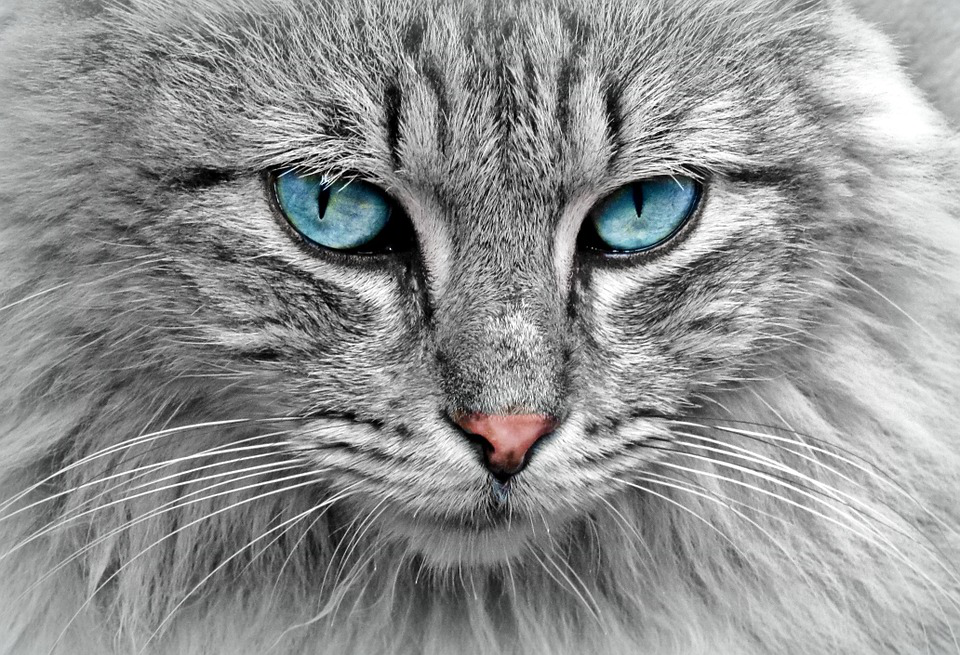

In [19]:
img = load_img("cat-1045782_960_720.jpg")
img

In [13]:
predict("IMG_0954.jpg"), predict("cat-1045782_960_720.jpg"), predict("100809217-dog-chases-cat-632x475.jpg")

(('dog', array([[0.9999999]], dtype=float32)),
 ('cat', array([[1.1852637e-06]], dtype=float32)),
 ('cat', array([[0.01086556]], dtype=float32)))

In [83]:
file = img_to_array(img)*1.0/255

In [90]:
from keras.preprocessing import image
import numpy as np
x = image.img_to_array(img)
x = x*1.0/255
x = np.expand_dims(x, axis=0)
x.shape

(1, 299, 299, 3)

In [101]:
#x = np.expand_dims(x, axis=0)
#images = np.vstack([x])
classes = catsdogs.predict(x)
#catsdogs.predict_classes(file)

In [103]:
classes

array([[0.99969566]], dtype=float32)

In [36]:
!ls -ltr /media/hdd1/dataset/cats_dogs/data/validation

total 36
drwxr-xr-x 2 sdutta sdutta 16384 Jun  8 16:20 cats
drwxr-xr-x 2 sdutta sdutta 20480 Jun  8 18:21 dogs


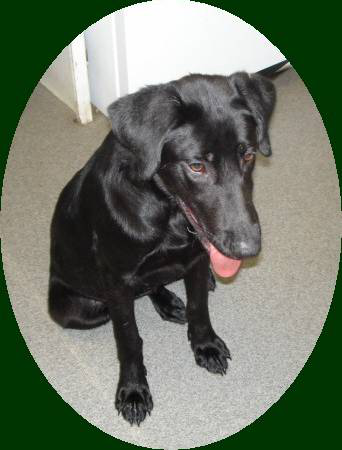

In [26]:
load_img("/media/hdd1/dataset/cats_dogs/test1/48.jpg")